<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/04_SupportVectorRegression_Position_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Load library

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# 1 . Load data

In [0]:
! git clone https://github.com/trongthuan205/DS102.K21 DS102.K21

Cloning into 'DS102.K21'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 207 (delta 39), reused 0 (delta 0), pack-reused 133
Receiving objects: 100% (207/207), 2.20 MiB | 10.93 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [0]:
data = pd.read_csv('DS102.K21/Position_Salaries.csv')

# 2 . Split data

In [0]:
X = np.array(data.iloc[:,1:-1].values).reshape(-1,1)
y = np.array(data.iloc[:,-1].values).reshape(-1,1)

# 3 . Normalize data

In [0]:
SC_X = StandardScaler()
SC_y = StandardScaler()

In [0]:
X_trans = SC_X.fit_transform(X)
y_trans = SC_y.fit_transform(y)

# 3 . Build model

In [0]:
svr = SVR(kernel = 'rbf')
svr.fit(X_trans, y_trans)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# 4 . Redifination 

In [0]:
def predict(model, X, SC_X, SC_y):
    X_trans = SC_X.transform(X)
    y_trans_pred = model.predict(X_trans)
    y_pred = SC_y.inverse_transform(y_trans_pred)
    return y_pred

In [0]:
y_pred = predict(svr, X, SC_X, SC_y)

# 5 . Visualize

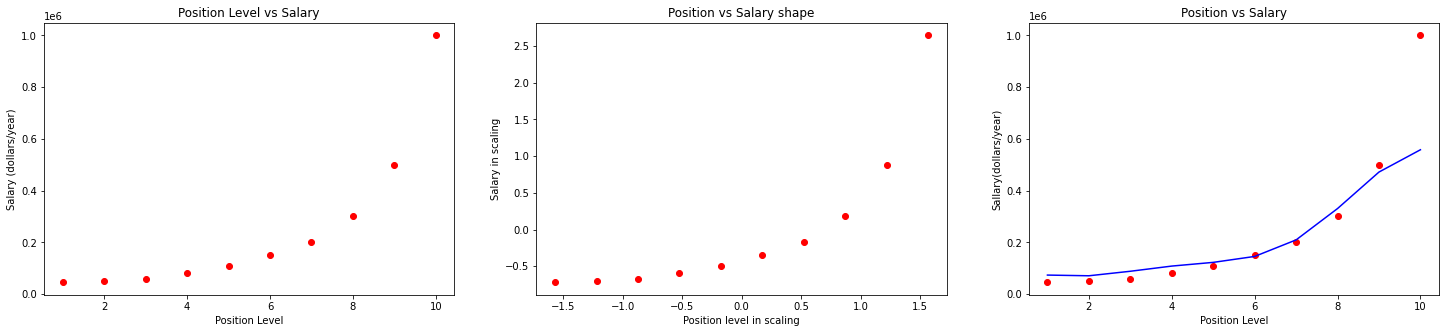

In [0]:
plt.figure(figsize = (25,5))
plt.subplot(1,3,1)
plt.scatter(X, y, color = 'red')
plt.xlabel('Position Level')
plt.ylabel('Salary (dollars/year)')
plt.title('Position Level vs Salary')
plt.subplot(1,3,2)
plt.scatter(X_trans, y_trans, color = 'red')
plt.xlabel('Position level in scaling')
plt.ylabel('Salary in scaling')
plt.title('Position vs Salary shape')
plt.subplot(1,3,3)
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Sallary(dollars/year)')
plt.title('Position vs Salary')
plt.show()